<a href="https://colab.research.google.com/github/gsheara/Education-Inequality/blob/main/Education_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introduction

##### The purpose of this notebook is to compare different possible predictors of ACT score based on socioeconomic data. This project examines both numerical data, such as rate of unemployment and income, and non-numerical data of school type.

## Import libraries

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='whitegrid')

# Import additional libraries
import altair as alt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

## Load clean data

In [54]:
num_train = pd.read_csv('https://raw.githubusercontent.com/gsheara/Education-Inequality/main/NumTrain.csv')
num_test= pd.read_csv('https://raw.githubusercontent.com/gsheara/Education-Inequality/main/NumTest.csv')
cat_train = pd.read_csv('https://raw.githubusercontent.com/gsheara/Education-Inequality/main/CatTrain.csv')
cat_test = pd.read_csv('https://raw.githubusercontent.com/gsheara/Education-Inequality/main/CatTest.csv')

In [55]:
num_cols = ['rate_unemployment', 'percent_college', 'percent_married', 'median_income', 'percent_lunch']
X_train = num_train[num_cols]
Y_train = num_train['average_act']
X_test = num_test[num_cols]
Y_test = num_test['average_act']

In [56]:
X_norm = (X_train - np.mean(X_train, axis=0)) / np.std(X_train, axis=0)
X_norm

,rate_unemployment,percent_college,percent_married,median_income,percent_lunch
0,-0.700898,0.446704,0.249196,0.239354,-0.377645
1,-0.527685,0.290020,0.913019,0.203055,-0.082310
2,-0.931005,1.546377,1.566111,0.669770,-0.614186
3,0.378942,0.637426,0.030600,0.101384,0.301488
4,-0.198143,0.182755,0.322819,-0.032561,0.159510
...,...,...,...,...,...
5253,-0.943158,-0.260052,1.137842,0.160801,-1.125670
5254,-1.008128,0.269608,0.585673,-0.397975,-0.655042
5255,0.475181,-0.598759,-1.293854,-0.706682,0.070820
5256,-0.527233,1.185942,0.814485,0.118138,-1.463212


In [57]:
num_train

,rate_unemployment,percent_college,percent_married,median_income,percent_lunch,average_act
0,0.058014,0.643316,0.682879,57997.0,0.327913,21.500000
1,0.067890,0.617397,0.813627,57113.0,0.397476,19.615385
2,0.044894,0.825230,0.942261,68479.0,0.272199,21.000000
3,0.119583,0.674866,0.639824,54637.0,0.487876,17.600000
4,0.086679,0.599652,0.697380,51375.0,0.454434,19.004884
...,...,...,...,...,...,...
5253,0.044201,0.526401,0.857909,56084.0,0.151724,22.000000
5254,0.040496,0.614020,0.749153,42476.0,0.262575,20.885226
5255,0.125070,0.470370,0.378957,34958.0,0.433544,16.900000
5256,0.067916,0.765605,0.794220,55045.0,0.072220,25.100000


In [58]:
num_test

,rate_unemployment,percent_college,percent_married,median_income,percent_lunch,average_act
0,0.048026,0.596376,0.551724,42212.0,0.647761,16.900000
1,0.029078,0.688315,0.697516,56046.0,0.178660,22.032967
2,0.057441,0.864228,0.873479,52794.0,0.271540,23.000000
3,0.147115,0.445931,0.234837,28302.0,0.882726,15.463980
4,0.061674,0.765009,0.949099,62034.0,0.183333,23.962149
...,...,...,...,...,...,...
2588,0.186224,0.418491,0.264355,19229.0,0.696007,16.904762
2589,0.215933,0.386025,0.183673,32478.0,0.531627,17.197802
2590,0.057911,0.696121,0.732037,60867.0,0.396655,19.688645
2591,0.043011,0.690651,0.840149,53293.0,0.411964,19.800000


In [11]:
cat_train

,school_type,average_act
0,Regular School,21.500000
1,Regular School,19.615385
2,Regular School,21.000000
3,Regular School,17.600000
4,Regular School,19.004884
...,...,...
5284,Regular School,22.000000
5285,Regular School,20.885226
5286,Regular School,16.900000
5287,Regular School,25.100000


In [12]:
cat_test

,school_type,average_act
0,Regular School,16.900000
1,Regular School,22.032967
2,Regular School,23.000000
3,Regular School,15.463980
4,Regular School,23.962149
...,...,...
2601,Regular School,16.904762
2602,Regular School,17.197802
2603,Regular School,19.688645
2604,Regular School,19.800000


## State your questions

To explore the overall question of if and how ACT scores can be predicted by socioeconomic data, I have isolated the three following questions:




1.   Can numerical socioeconomic data be used as a predictor of ACT scores?
2.   If so, which aspect of this data can be used as the most accurate predictor?
3.   Can school type (as an example of categorical data) be used as a predictor of ACT scores?






## Analysis

In [66]:
# code for plotting results from in-class Model Selection notebook
def plot_results(y_train, y_test, y_pred_train, y_pred_test):
  one_train = np.linspace(y_train.min(), y_train.max(), 100)
  one_test = np.linspace(y_test.min(), y_test.max(), 100)
  rmse_test = np.sqrt(np.mean((y_pred_test - y_test)**2))
  rmse_train = np.sqrt(np.mean((y_pred_train - y_train)**2))

  fig,(ax1, ax2) = plt.subplots(1, 2)
  ax1.plot(y_pred_train, y_train, 'o')
  ax1.plot(one_train, one_train, '-', label=f"RMSE = {rmse_train:.2f} points")
  ax1.set_title("Training Set")
  ax1.set_xlabel("Predicted ACT Score")
  ax1.set_ylabel("Actual ACT Score")
  ax1.legend()

  ax2.plot(y_pred_test, y_test, 'o')
  ax2.plot(one_test, one_test, '-', label=f"RMSE = {rmse_test:.2f} points")
  ax2.legend()
  ax2.set_title("Test Set")
  ax2.set_xlabel("Predicted ACT Score")
  ax2.set_ylabel("Actual ACT Score")
  fig.set_size_inches(12, 5)

### Question 1
To address question one, I began with some basic visualizations to become acquainted with patterns that may be reflected in the model predictions. I used the test datasets because the train datasets were too large for the Altair library to process.

In [60]:
chartUR = alt.Chart(num_test).mark_circle(opacity=0.4).encode(
    alt.X('rate_unemployment', title='Unemployment Rate'),
    alt.Y('average_act', title= 'Average ACT Score')
).properties(title='ACT Score by Unemployment Rate')

chartPC = alt.Chart(num_test).mark_circle(opacity=0.4).encode(
    alt.X('percent_college', title='Percent College'),
    alt.Y('average_act', title= 'Average ACT Score')
).properties(title='ACT Score by Percent of College Graduates')

chartPM = alt.Chart(num_test).mark_circle(opacity=0.4).encode(
    alt.X('percent_married', title='Percent Married'),
    alt.Y('average_act', title= 'Average ACT Score')
).properties(title='ACT Score by Percent of Married Couples')

chartMI = alt.Chart(num_test).mark_circle(opacity=0.4).encode(
    alt.X('median_income', title='Median Income'),
    alt.Y('average_act', title= 'Average ACT Score')
).properties(title='ACT Score by Median Income')

chartPL = alt.Chart(num_test).mark_circle(opacity=0.4).encode(
    alt.X('percent_lunch', title='Percent Lunch'),
    alt.Y('average_act', title= 'Average ACT Score')
).properties(title='ACT Score by Percent Receiving Free/Reduced Lunch')

chartUR | chartPC | chartPM

alt.HConcatChart(...)

In [35]:
chartMI | chartPL

alt.HConcatChart(...)

These quick visualizations show patterns we may notice reflected in the prediction models, such as ACT score increasing with percent of college grads, married couples, and median income, and decreasing by unemployment rate and percent receiving free or reduced lunch. Based on a rough observation of these charts alone, it seems that percent of students who receive free or reduced lunch may be the strongest predictor of ACT score, as there is a noticeable downward linear pattern.

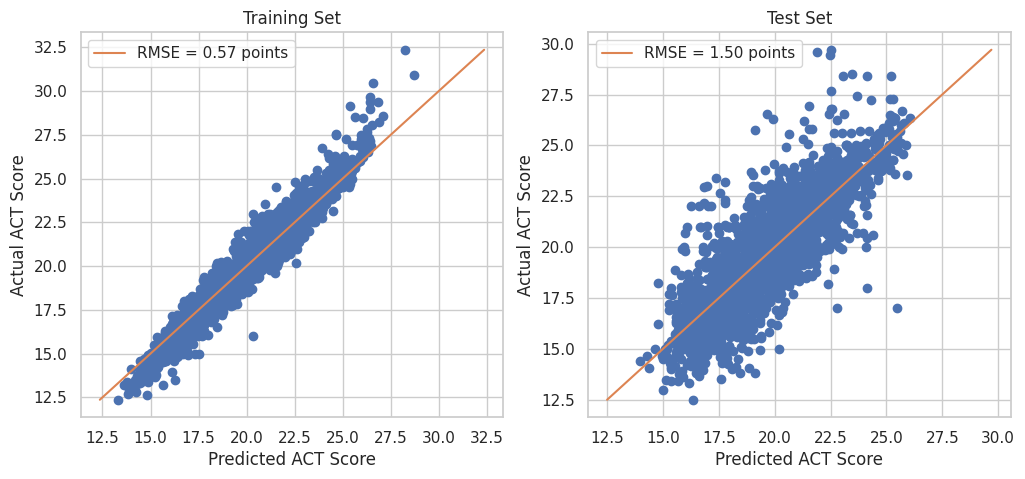

In [67]:
rf_reg = RandomForestRegressor(n_estimators=100).fit(X_train, Y_train)
Y_pred_test = rf_reg.predict(X_test)
Y_pred_train = rf_reg.predict(X_train)
plot_results(Y_train, Y_test, Y_pred_train, Y_pred_test)

Using a basic train/test split model, it seems that numerical socioeconomic data can be used as a pretty viable predictor of ACT score, within a point and a half. One thing of note in this chart is the fact that there seems to be a cutoff in the Test Set where the predicted ACT score doesn't go much past 25 or 26, despite actual ACT scores going up to 30. A similar but more subtle pattern of under-predicting high ACT scores is apparent in the Training Set as well.

### Question 2

Using the a simple linear regression, we may use the order of coefficients to examine which of the quantitative variables makes the strongest predictor of score.

In [70]:
lin_reg = LinearRegression(fit_intercept=False).fit(X_test, Y_test)
lin_reg.coef_

array([ 3.41828367e+01,  1.45273223e+01,  1.49403148e+01, -2.32797134e-05,
       -2.47869596e-01])

Based on these values, unemployment rate may play the strongest role in predicting ACT scores.

### Question 3

I similarly began with a basic visualization fo the categorical data.

In [26]:
alt.Chart(cat_test).mark_circle(opacity=0.4).encode(
    alt.X('school_type', title='School Type'),
    alt.Y('average_act', title= 'Average ACT Score')
).properties(title='ACT Score by School Type')

alt.Chart(...)

This plot shows that while there are far more entries for regular schools and a significantly larger spread, the overall average is not necessarily clear. Alternative and Special Education schools seem to both stay around the 20-22 score range.

In [83]:
cat_train['school_type'].unique()

array(['Regular School', 'Alternative School', 'Special Education School',
       'Career and Technical School'], dtype=object)

To analyze this categorical variable, I decided to use panda's 'get dummies' library for one-hot encoding. I also decided that because entries for Alternative, Career and Technical, and Special education schools are so insignificant, I would group them into a single 'non-regular' category. Using a binary system would also be beneficial.

In [95]:
cat_train['school_type'].replace(['Special Education School', 'Career and Technical School', 'Alternative School'], 'Non-regular School')


array(['Regular School', 'Alternative School', 'Special Education School',
       'Career and Technical School'], dtype=object)

In [82]:
one_hot_encoded_data = pd.get_dummies(cat_train, columns = ['school_type'])
one_hot_encoded_data


,average_act,school_type_Alternative School,school_type_Career and Technical School,school_type_Regular School,school_type_Special Education School
0,21.500000,False,False,True,False
1,19.615385,False,False,True,False
2,21.000000,False,False,True,False
3,17.600000,False,False,True,False
4,19.004884,False,False,True,False
...,...,...,...,...,...
5284,22.000000,False,False,True,False
5285,20.885226,False,False,True,False
5286,16.900000,False,False,True,False
5287,25.100000,False,False,True,False


## Conclusion

In conclusion, it seems that the numerical data collected on socioeconomic factors in surrounding areas of different high schools can be used as the best predictor of ACT scores. There was about a point and a half of variance overall, and some difficulty in accurately predicting the higher scores of the datasets. The categorical data used, school type, is possibly more difficult to compare because an overwhelming number of schools are regular as opposed to career and technical, alternative, and special education, and this regular school group also saw the biggest range.